In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from datetime import datetime, timedelta

### Input Data
    Dataset from NSE (National Stock Exchange).

### Features
    1. Date       : Trading period in which sales are measured and compared to previous periods. (1 day in this case)
    
    2. Open       : The opening price is the price from the first transaction of a business day.
    
    3. High       : The high is the highest price at which a stock traded during a period.
    
    4. Low        : The low is the lowest price of the period.
    
    5. Close      : The listed closing price is the last price anyone paid for a share of that stock during the business                       hours of the exchange where the stock trades.
    
    6. Adj Close  : The adjusted closing price amends a stock's closing price to reflect that stock's value after                               accounting for any corporate actions.
    
    7. Volume     : Trading volume is a measure of how much a given financial asset has traded in a period of time.

In [2]:
# Read the dataset
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [3]:
# Sorting the data by dates
df = df.sort_values(by="Date")

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [4]:
# Print general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.6+ KB


In [5]:
#checking for null values
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

<AxesSubplot:>

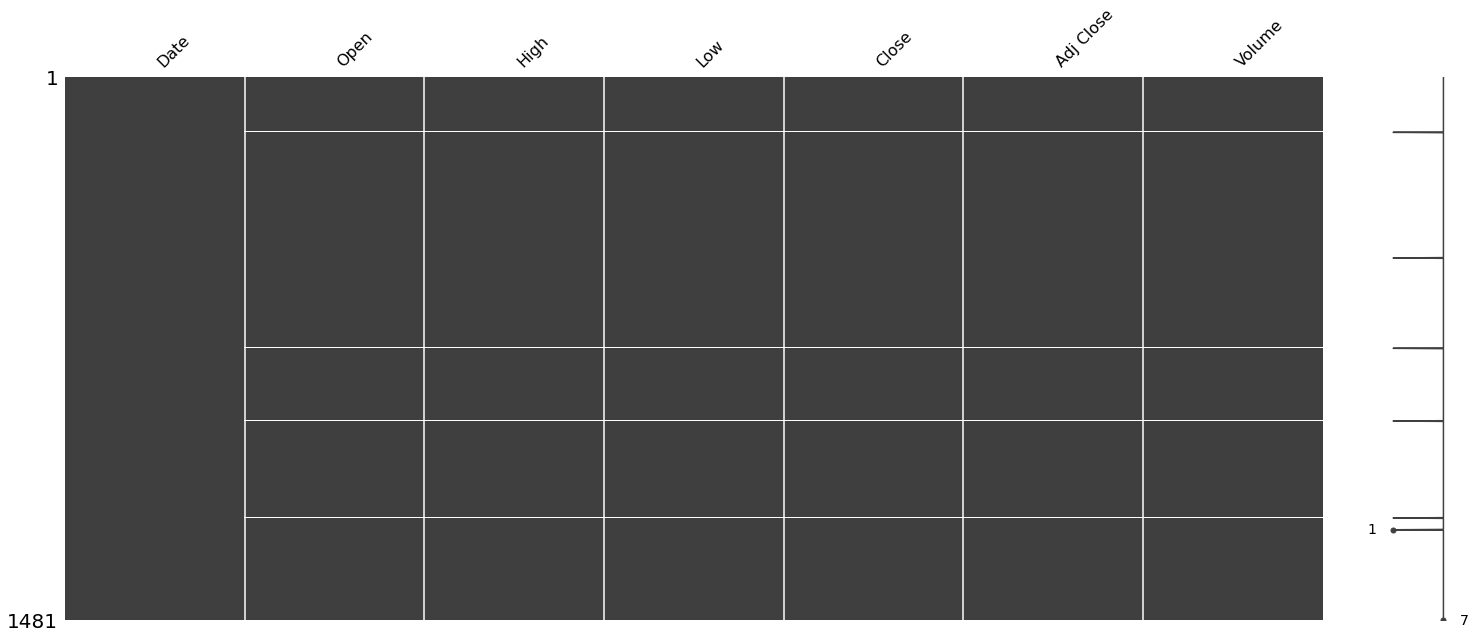

In [6]:
# Visalizing missing values
msno.matrix(df)

### Key Take-Aways
    1. There are 7 given features.
    2. All features are numerical type.
    3. There are 1481 entries in the dataset.
    4. 6 values are missing from each column in the dataset.

In [7]:
# Droping the null value rows from the dataset
df.dropna(inplace = True)

#checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:>

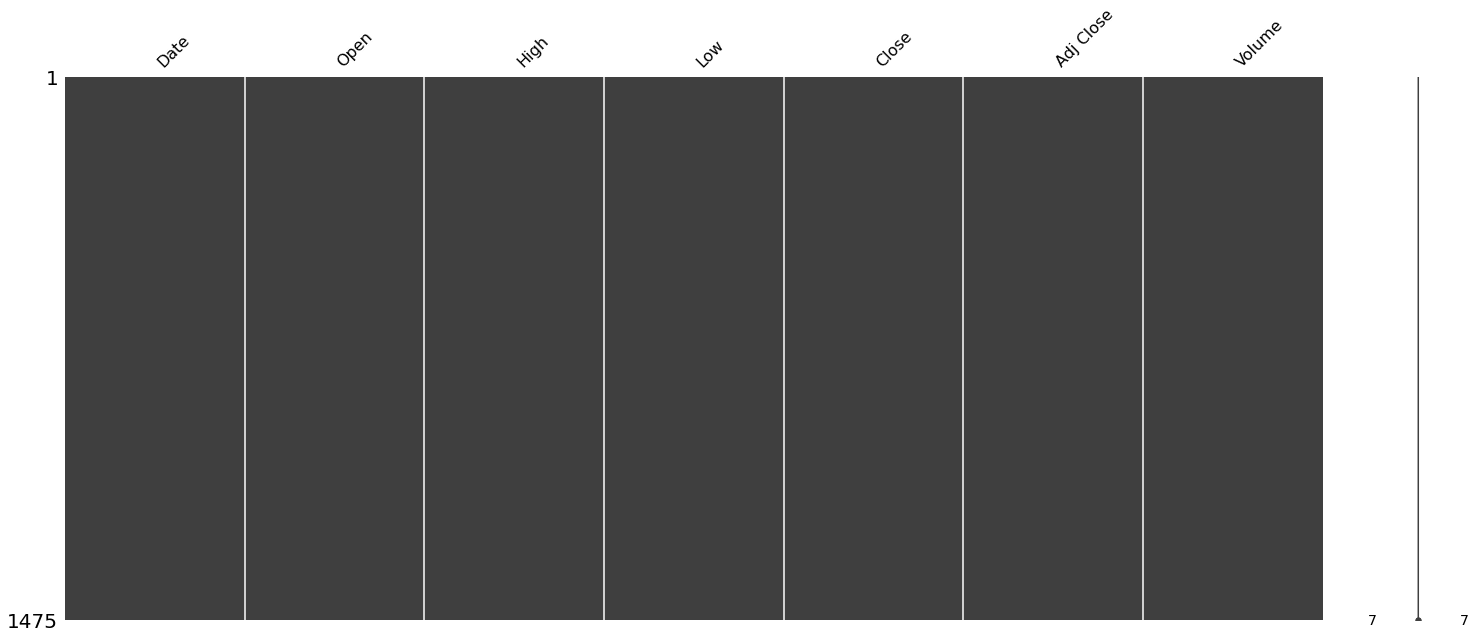

In [8]:
# Visalizing missing values
msno.matrix(df)

In [9]:
# Print basic statistical details about dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [10]:
# Checking if the "close" and "Adj Close" values are same
df['Close'].equals(df['Adj Close']) 

True

### Key Take-Aways
    1. "Close" and "Adj Close" columns are same
    2. Missing value rows have been removed from the dataset

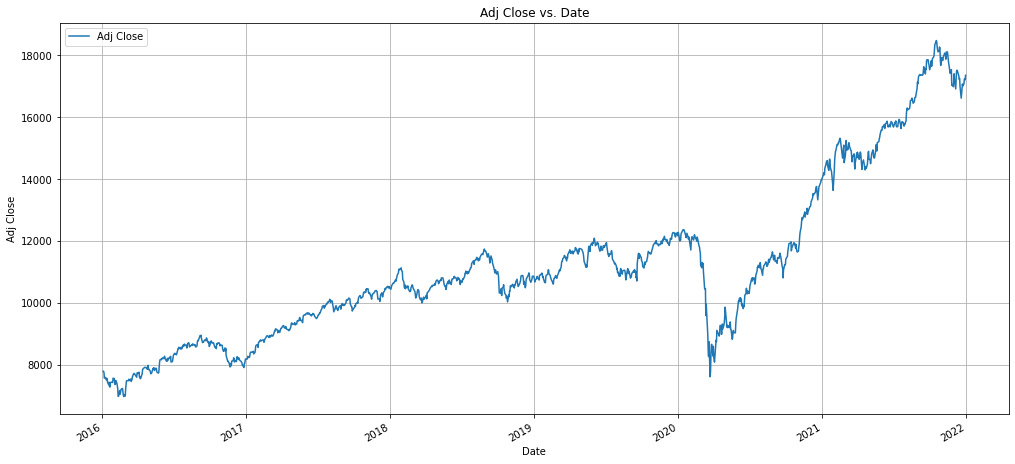

<Figure size 432x288 with 0 Axes>

In [11]:
# Visualize the historical view of the Adjusted closing price
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Adj Close vs. Date', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df['Date']), df['Adj Close'], label='Adj Close')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

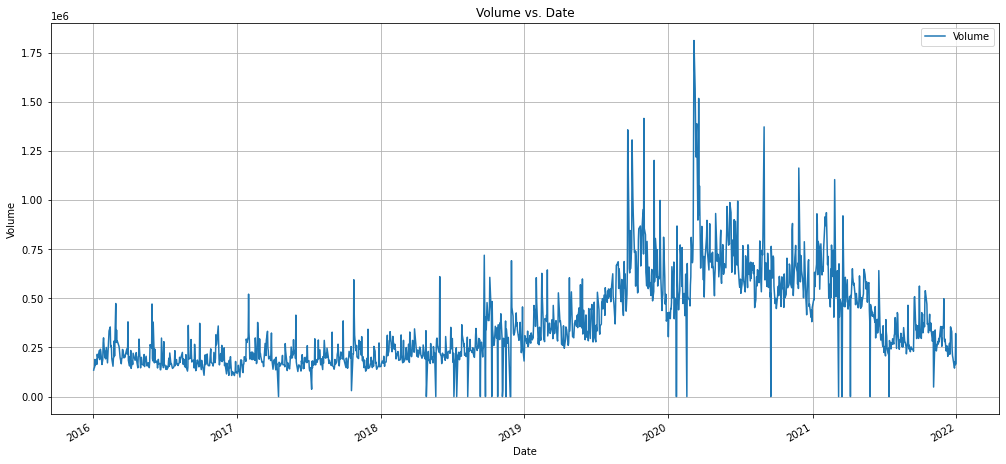

<Figure size 432x288 with 0 Axes>

In [12]:
# Visualize the historical view of traded volume
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Volume vs. Date', xlabel = 'Date', ylabel = 'Volume')
ax.grid()
plt.plot(pd.to_datetime(df['Date']), df['Volume'], label='Volume')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [13]:
# Copying the dataset
df_wip = df

# Calculating the returns
df_wip['Returns'] = df_wip['Adj Close'].pct_change()*100

# Print and check
df_wip

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,NaN
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,-0.085350
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,-0.560718
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,-2.230980
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,0.436694
...,...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0,0.485187
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0,0.860341
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0,-0.114026
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0,-0.056063


In [14]:
# Defining the time frames for calculating moving averages
ma_day = [10, 20, 50]

# Calculate moving average for mentioned time frames
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_wip[column_name] = df_wip['Adj Close'].rolling(ma).mean()

# Print and check the updated dataset with moving averages
df_wip

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MA for 10 days,MA for 20 days,MA for 50 days
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,NaN,NaN,NaN,NaN
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,-0.085350,NaN,NaN,NaN
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,-0.560718,NaN,NaN,NaN
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,-2.230980,NaN,NaN,NaN
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,0.436694,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0,0.485187,17028.299805,17149.327344,17606.175938
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0,0.860341,17019.134766,17161.829883,17584.069922
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0,-0.114026,17018.354687,17164.164844,17558.800898
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0,-0.056063,17013.909570,17154.279785,17534.504883


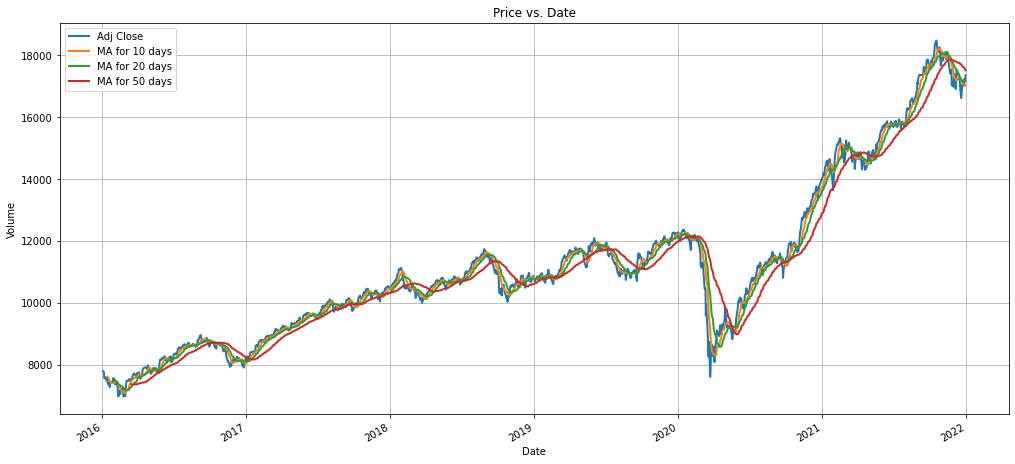

<Figure size 432x288 with 0 Axes>

In [15]:
# Defining the linewidth for the plot
line_width = 2.0

# Visualize the collected data
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Price vs. Date', xlabel = 'Date', ylabel = 'Volume')
ax.grid()
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['Adj Close'], linewidth=line_width, label='Adj Close')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 10 days'], linewidth=line_width, label='MA for 10 days')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 20 days'], linewidth=line_width, label='MA for 20 days')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 50 days'], linewidth=line_width, label='MA for 50 days')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

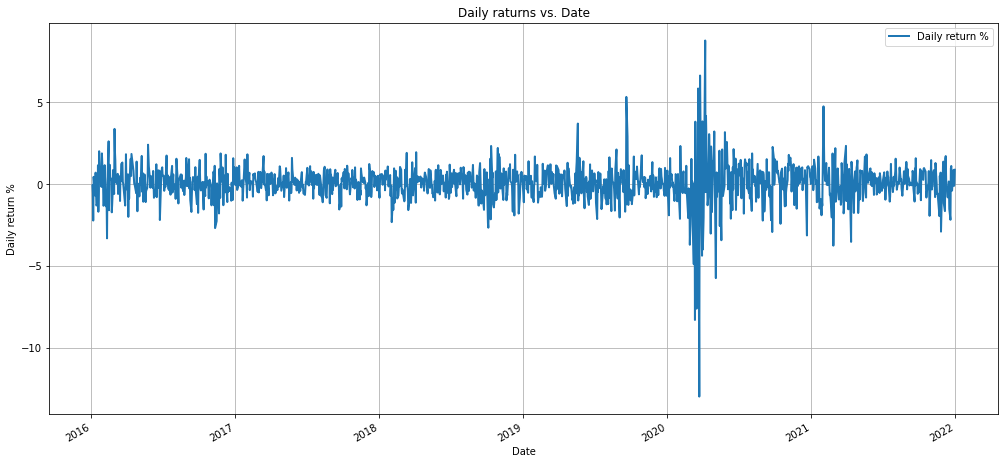

<Figure size 432x288 with 0 Axes>

In [16]:
# Visualize the daily returns
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Daily raturns vs. Date', xlabel = 'Date', ylabel = 'Daily return %')
ax.grid()
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['Returns'], linewidth=line_width, label='Daily return %')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

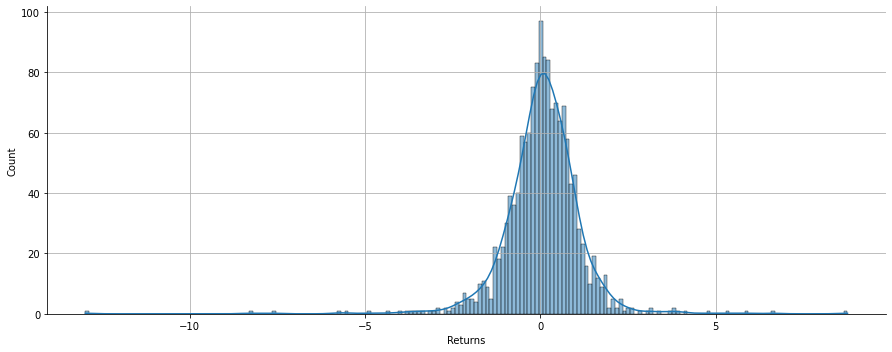

In [17]:
# Plot the distribution of daily returns
sns.displot(data=df_wip, kde=True, x="Returns", kind='hist', height=5, aspect=2.5, bins=200)
plt.grid()

<AxesSubplot:xlabel='Returns'>

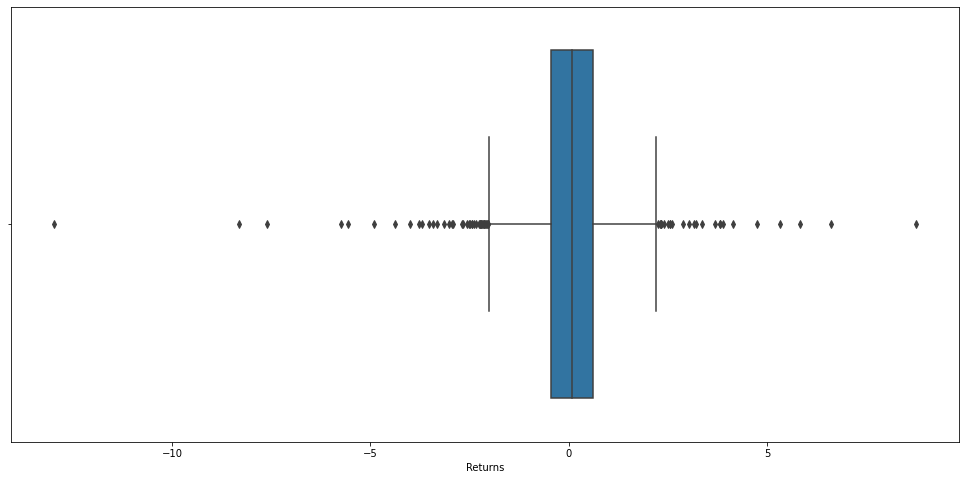

In [18]:
# Plot boxplot for the daily returns
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.boxplot(df_wip['Returns'])

In [19]:
Q1 = df_wip['Returns'].quantile(0.25)
print("Q1 : ",Q1)
Q3 = df_wip['Returns'].quantile(0.75)
print("Q3 : ",Q3)

Q1 :  -0.4349161269735946
Q3 :  0.6232176288546998


### Key Take-Aways
    1. It can be seen that majority of daily returns are seen between -0.43% and 0.62%

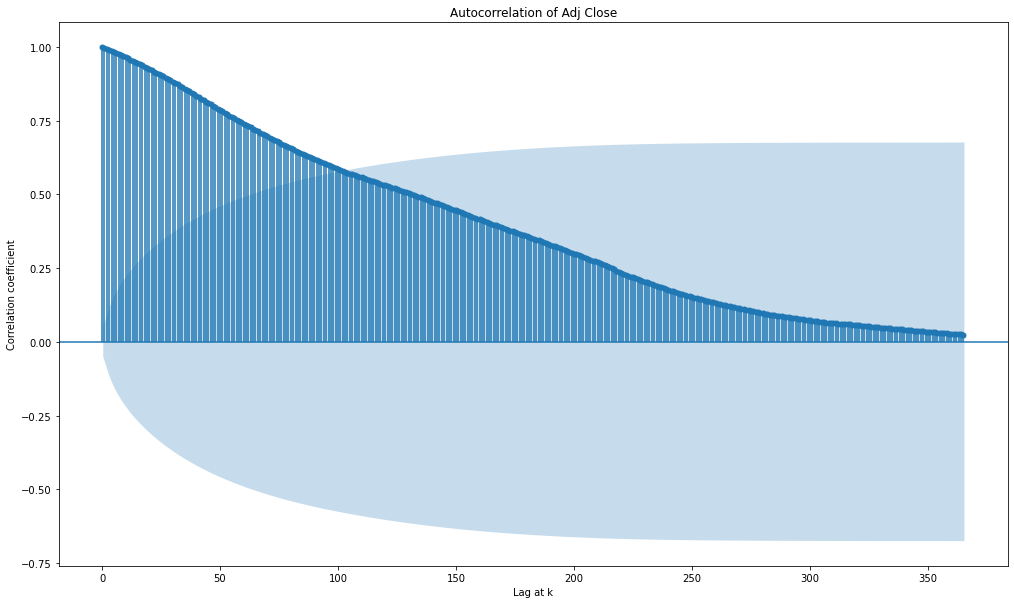

In [20]:
# Setting the plot size
plt.rcParams["figure.figsize"] = 17,10

# # Plotting autocorrelation for Adj Close
fig = tsaplots.plot_acf(df_wip["Adj Close"], lags=365)

plt.title("Autocorrelation of Adj Close")
plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

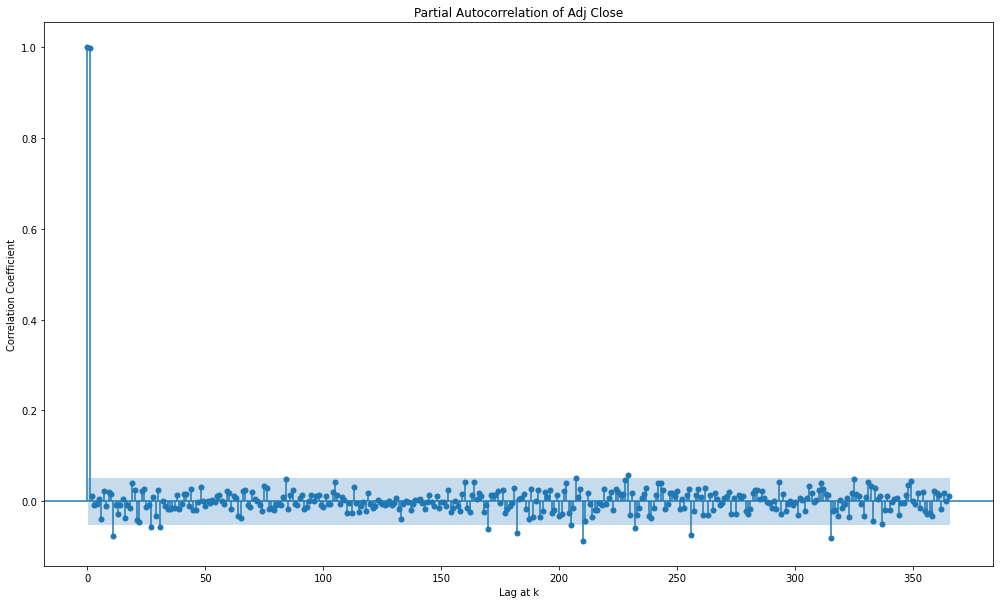

In [21]:
# Setting the plot size
plt.rcParams["figure.figsize"] = 17, 10

# Plotting partial autocorrelation for Adj Close
fig = tsaplots.plot_pacf(df_wip["Adj Close"], lags=365)
plt.title("Partial Autocorrelation of Adj Close")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

In [22]:
# Creating a dataframe with "Adj Close" with "Date" as index to use in decomposition
df_wip2 = pd.DataFrame(df_wip['Adj Close'])
df_wip2['Date'] = df_wip['Date']
df_wip2['Date']= pd.to_datetime(df_wip2['Date'])
df_wip2 = df_wip2.set_index('Date')

# Print and check
df_wip2

,Adj Close
Date,
2016-01-04,7791.299805
2016-01-05,7784.649902
2016-01-06,7741.000000
2016-01-07,7568.299805
2016-01-08,7601.350098
...,...
2021-12-27,17086.250000
2021-12-28,17233.250000
2021-12-29,17213.599609


<AxesSubplot:xlabel='Date', ylabel='Residual'>

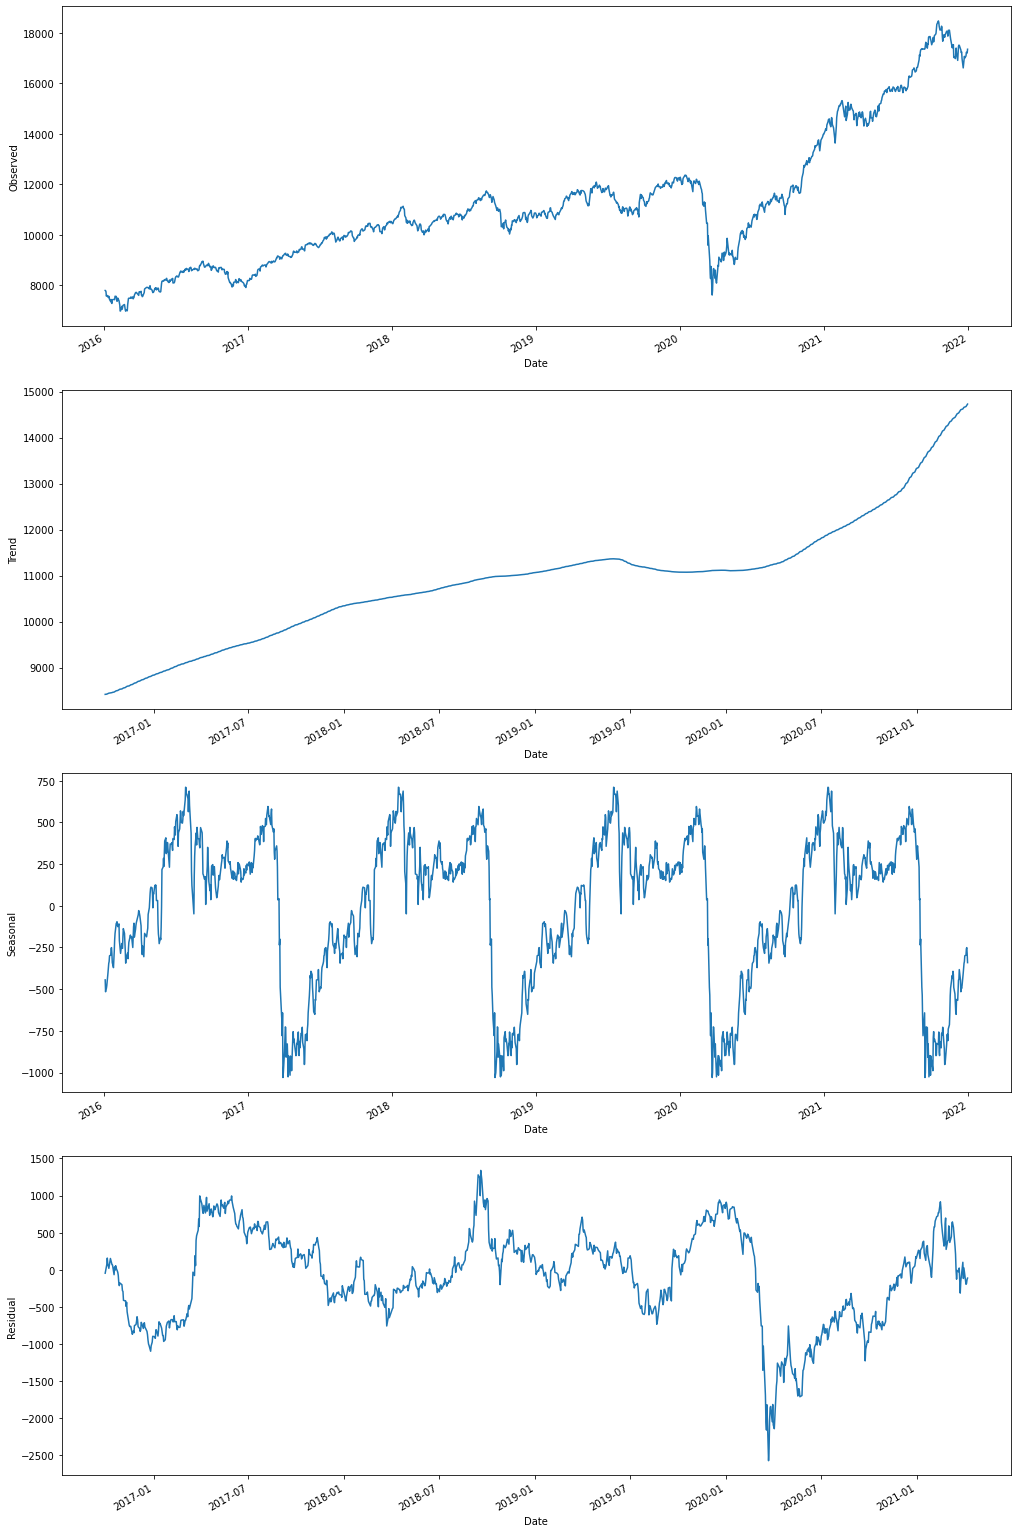

In [23]:
# Decomposing the time series as Trend, Seasonality & Residual Noise
# The frequncy is annual
decomposed_data = sm.tsa.seasonal_decompose(df_wip2,freq=365) 

# Plotting the decomposed data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17, 30))
decomposed_data.observed.plot(ax=ax1, ylabel="Observed")
decomposed_data.trend.plot(ax=ax2, ylabel="Trend")
decomposed_data.seasonal.plot(ax=ax3, ylabel="Seasonal")
decomposed_data.resid.plot(ax=ax4, ylabel="Residual")

Text(0, 0.5, 'Risk')

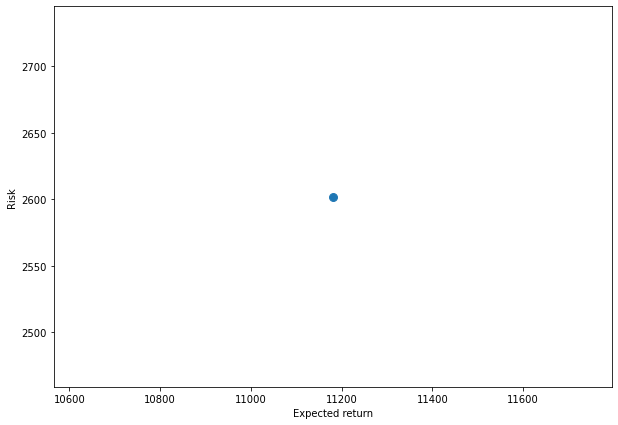

In [24]:
# Calculate risk by comparing the expected return with the standard deviation of the daily returns
plt.figure(figsize=(10, 7))
plt.scatter(df_wip["Adj Close"].mean(), df_wip["Adj Close"].std(), np.pi * 20)
plt.xlabel('Expected return')
plt.ylabel('Risk')

## Multivariate LSTM

In [25]:
# Extracting the required features
df_input = df_wip[['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Print and check
df_input

,Adj Close,Open,High,Low,Close,Volume
0,7791.299805,7924.549805,7937.549805,7781.100098,7791.299805,134700.0
1,7784.649902,7828.399902,7831.200195,7763.250000,7784.649902,145200.0
2,7741.000000,7788.049805,7800.950195,7721.200195,7741.000000,147100.0
3,7568.299805,7673.350098,7674.950195,7556.600098,7568.299805,188900.0
4,7601.350098,7611.649902,7634.100098,7581.049805,7601.350098,157400.0
...,...,...,...,...,...,...
1476,17086.250000,16937.750000,17112.050781,16833.199219,17086.250000,144800.0
1477,17233.250000,17177.599609,17250.250000,17161.150391,17233.250000,176000.0
1478,17213.599609,17220.099609,17285.949219,17176.650391,17213.599609,161700.0
1479,17203.949219,17201.449219,17264.050781,17146.349609,17203.949219,320800.0


In [26]:
# Adding a column for predictions before scaling
#df_input_wip=df_input
#df_input_wip.insert (0, "Preds", np.nan)
#df_input_wip

In [27]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Print and check
scaled_data

array([[0.07132518, 0.07780666, 0.07807521, 0.08221526, 0.07132518,
        0.0743788 ],
       [0.07074726, 0.06950262, 0.06888356, 0.08067904, 0.07074726,
        0.0801767 ],
       [0.06695374, 0.06601777, 0.0662691 , 0.07706014, 0.06695374,
        0.08122584],
       ...,
       [0.89019627, 0.88062131, 0.88604394, 0.89081714, 0.89019627,
        0.08928769],
       [0.88935758, 0.87901056, 0.88415129, 0.88820938, 0.88935758,
        0.1771397 ],
       [0.90240257, 0.88272866, 0.89597039, 0.89614005, 0.90240257,
        0.09221425]])

In [28]:
# Extracting the required features from the scaled data
features = scaled_data[:,0:]

# Extracting target from the scaled data
target = scaled_data[:,1]

In [29]:
# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of validation set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (1032, 6)
Shape of y_train :  (1032,)
Shape of x_test :  (443, 6)
Shape of y_test :  (443,)


In [30]:
# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

In [31]:
# Building LSTM model
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(time_step, num_features)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 64)           49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                9000      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 127,554
Trainable params: 127,554
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 12s 213ms/step - loss: 0.0028 - mean_absolute_error: 0.0438 - val_loss: 0.0417 - val_mean_absolute_error: 0.1816
Epoch 2/25
30/30 [==============================] - 5s 161ms/step - loss: 0.0035 - mean_absolute_error: 0.0488 - val_loss: 0.0269 - val_mean_absolute_error: 0.1398
Epoch 3/25
30/30 [==============================] - 5s 160ms/step - loss: 0.0053 - mean_absolute_error: 0.0626 - val_loss: 0.0258 - val_mean_absolute_error: 0.1359
Epoch 4/25
30/30 [==============================] - 5s 171ms/step - loss: 0.0055 - mean_absolute_error: 0.0649 - val_loss: 0.0340 - val_mean_absolute_error: 0.1591
Epoch 5/25
30/30 [==============================] - 5s 165ms/step - loss: 0.0043 - mean_absolute_error: 0.0553 - val_loss: 0.0242 - val_mean_absolute_error: 0.1339
Epoch 6/25
30/30 [==============================] - 5s 162ms/step - loss: 0.0025 - mean_absolute_error: 0.0419 - val_loss: 0.0180 - val_mean_absolute_error: 0.1138
Epoch 7/25
30/3

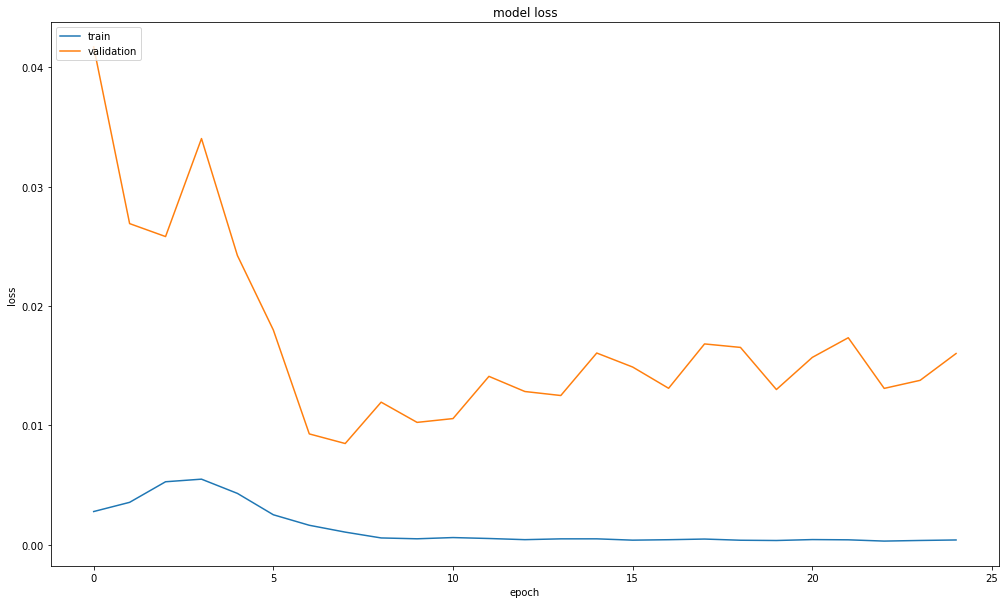

In [32]:
# Compiling the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.metrics.MeanAbsoluteError()])

# Training the model
history1 = model.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
# Generate predictions
train_predictions_scaled = model.predict_generator(train_generator)
val_predictions_scaled = model.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,1:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,1:][time_step:])], axis=1)

In [34]:
# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

print("Shape of train predictions : ", train_data[:,0].shape)
print("Shape of validation predictions : ", val_data[:,0].shape)

Shape of train predictions :  (932,)
Shape of validation predictions :  (343,)


In [35]:
# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]
df_plot

,Date,Adj Close
0,2016-01-04,7791.299805
1,2016-01-05,7784.649902
2,2016-01-06,7741.000000
3,2016-01-07,7568.299805
4,2016-01-08,7601.350098
...,...,...
1476,2021-12-27,17086.250000
1477,2021-12-28,17233.250000
1478,2021-12-29,17213.599609
1479,2021-12-30,17203.949219


In [36]:
# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Print and check
df_plot

,Date,Adj Close,train_preds
0,2016-01-04,7791.299805,NaN
1,2016-01-05,7784.649902,NaN
2,2016-01-06,7741.000000,NaN
3,2016-01-07,7568.299805,NaN
4,2016-01-08,7601.350098,NaN
...,...,...,...
1476,2021-12-27,17086.250000,NaN
1477,2021-12-28,17233.250000,NaN
1478,2021-12-29,17213.599609,NaN
1479,2021-12-30,17203.949219,NaN


In [37]:
# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

# Print and check
df_plot

,Date,Adj Close,train_preds,val_preds
0,2016-01-04,7791.299805,NaN,NaN
1,2016-01-05,7784.649902,NaN,NaN
2,2016-01-06,7741.000000,NaN,NaN
3,2016-01-07,7568.299805,NaN,NaN
4,2016-01-08,7601.350098,NaN,NaN
...,...,...,...,...
1476,2021-12-27,17086.250000,NaN,14901.265458
1477,2021-12-28,17233.250000,NaN,14911.260860
1478,2021-12-29,17213.599609,NaN,14932.951855
1479,2021-12-30,17203.949219,NaN,14961.150767


In [38]:
# Define function to get the metrics
def calculate_metrics(y_true, y_pred):
    MSE = math.sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    
    print("MSE : ", MSE)
    print("R2 Score : ", R2)
    print("MAPE : ", MAPE)
    
    print()
    return [MSE, R2, MAPE]

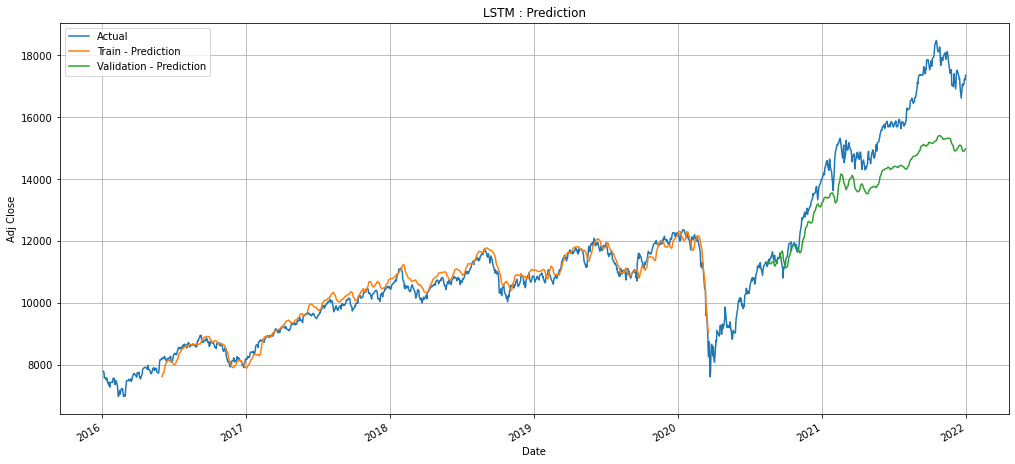

<Figure size 1224x720 with 0 Axes>

In [39]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [40]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics=pd.DataFrame(calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0]), columns=['Multivariate'], index =['MSE', 'R2', 'MAPE',])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics=pd.DataFrame(calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0]), columns=['Multivariate'], index =['MSE', 'R2', 'MAPE',])

Training Metrics:
MSE :  238.1111065652565
R2 Score :  0.9598287114561447
MAPE :  0.018486211616358533

Validation Metrics:
MSE :  1536.8054890166723
R2 Score :  0.45864427352502257
MAPE :  0.0803604674562336



## Univariate LSTM, model1, time_step=100

In [41]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [42]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Extracting the required features from the scaled data
features = scaled_data

# Extracting target from the scaled data
target = scaled_data[:,0]

# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

# Building LSTM model
model1=Sequential()
model1.add(LSTM(128,return_sequences=True,input_shape=(time_step, num_features)))
model1.add(LSTM(64,return_sequences=True))
model1.add(LSTM(25))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

# Printing model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 64)           49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                9000      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 124,994
Trainable params: 124,994
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 11s 202ms/step - loss: 0.0025 - mean_absolute_error: 0.0386 - val_loss: 0.0489 - val_mean_absolute_error: 0.1994
Epoch 2/25
30/30 [==============================] - 5s 153ms/step - loss: 0.0051 - mean_absolute_error: 0.0582 - val_loss: 0.0539 - val_mean_absolute_error: 0.2002
Epoch 3/25
30/30 [==============================] - 4s 146ms/step - loss: 0.0066 - mean_absolute_error: 0.0700 - val_loss: 0.0609 - val_mean_absolute_error: 0.2148
Epoch 4/25
30/30 [==============================] - 4s 147ms/step - loss: 0.0056 - mean_absolute_error: 0.0634 - val_loss: 0.0709 - val_mean_absolute_error: 0.2347
Epoch 5/25
30/30 [==============================] - 4s 147ms/step - loss: 0.0054 - mean_absolute_error: 0.0619 - val_loss: 0.0749 - val_mean_absolute_error: 0.2392
Epoch 6/25
30/30 [==============================] - 4s 145ms/step - loss: 0.0059 - mean_absolute_error: 0.0660 - val_loss: 0.0852 - val_mean_absolute_error: 0.2560
Epoch 7/25
30/3

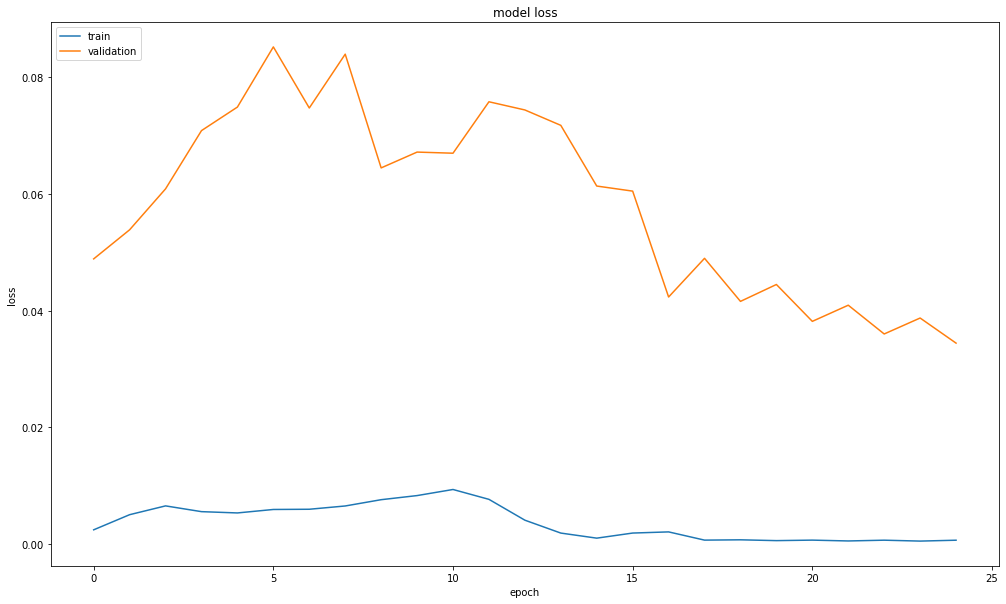

In [43]:
# Compiling the LSTM model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.metrics.MeanAbsoluteError()])

# Training the model
history1 = model1.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
# Generate predictions
train_predictions_scaled = model1.predict_generator(train_generator)
val_predictions_scaled = model1.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,0:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,0:][time_step:])], axis=1)

# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]

# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

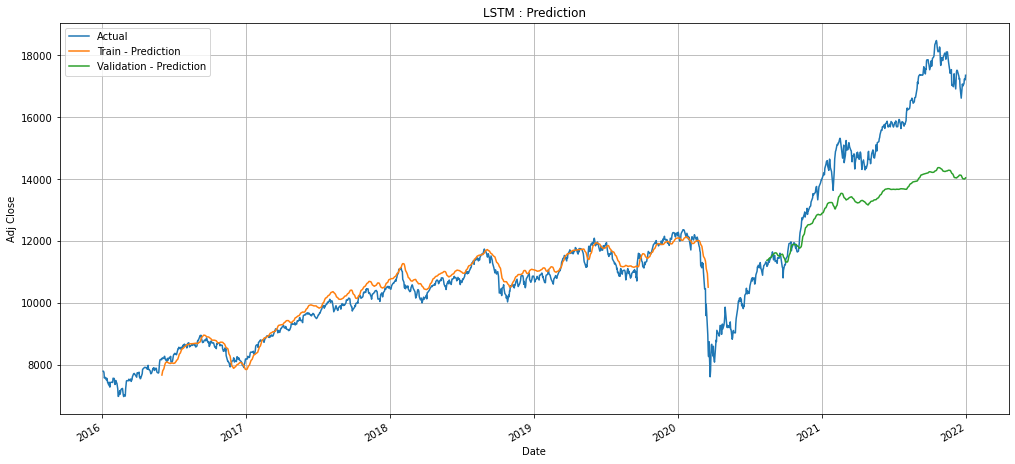

<Figure size 1224x720 with 0 Axes>

In [45]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [46]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100"]=calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100"]=calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0])

Training Metrics:
MSE :  278.45417557155395
R2 Score :  0.9450631283182755
MAPE :  0.02077399607320987

Validation Metrics:
MSE :  2135.6900850016705
R2 Score :  -0.045493632047889365
MAPE :  0.11052827014385729



## Univariate LSTM, model2, time_step=100

In [47]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [48]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Extracting the required features from the scaled data
features = scaled_data

# Extracting target from the scaled data
target = scaled_data[:,0]

# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

# Building LSTM model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

# Printing model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 9s 151ms/step - loss: 0.0028 - mean_absolute_error: 0.0379 - val_loss: 0.0602 - val_mean_absolute_error: 0.2218
Epoch 2/25
30/30 [==============================] - 3s 116ms/step - loss: 0.0083 - mean_absolute_error: 0.0779 - val_loss: 0.0757 - val_mean_absolute_error: 0.2434
Epoch 3/25
30/30 [==============================] - 3s 116ms/step - loss: 0.0085 - mean_absolute_error: 0.0771 - val_loss: 0.0724 - val_mean_absolute_error: 0.2381
Epoch 4/25
30/30 [==============================] - 4s 121ms/step - loss: 0.0089 - mean_absolute_error: 0.0802 - val_loss: 0.0666 - val_mean_absolute_error: 0.2240
Epoch 5/25
30/30 [==============================] - 4s 117ms/step - loss: 0.0101 - mean_absolute_error: 0.0857 - val_loss: 0.0709 - val_mean_absolute_error: 0.2300
Epoch 6/25
30/30 [==============================] - 3s 113ms/step - loss: 0.0114 - mean_absolute_error: 0.0934 - val_loss: 0.0391 - val_mean_absolute_error: 0.1701
Epoch 7/25
30/30

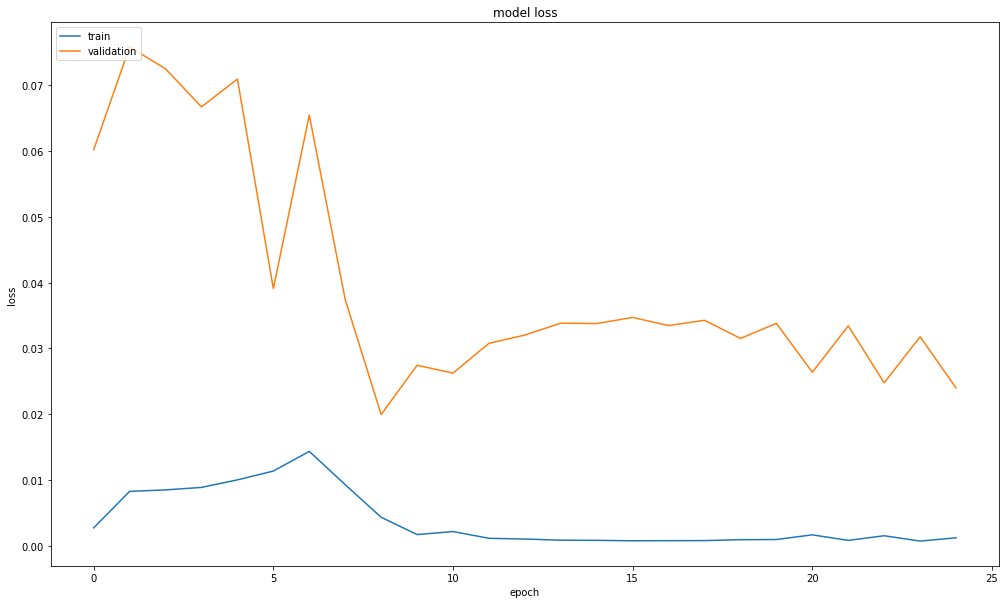

In [49]:
# Compiling the LSTM model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.metrics.MeanAbsoluteError()])

# Training the model
history1 = model2.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
# Generate predictions
train_predictions_scaled = model2.predict_generator(train_generator)
val_predictions_scaled = model2.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,1:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,1:][time_step:])], axis=1)

# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]

# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

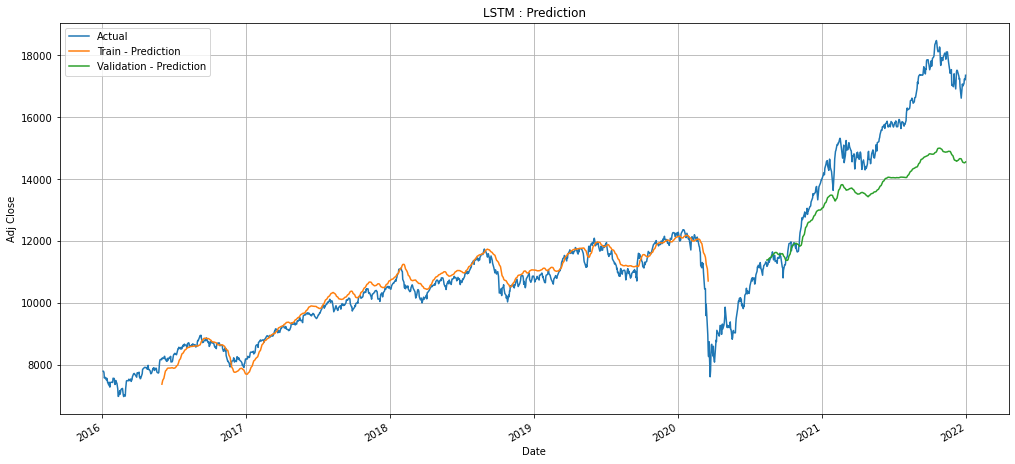

<Figure size 1224x720 with 0 Axes>

In [51]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [52]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100_model2"]=calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100_model2"]=calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0])

Training Metrics:
MSE :  302.95621837170677
R2 Score :  0.9349696340332587
MAPE :  0.022431827946020475

Validation Metrics:
MSE :  1782.7331437547814
R2 Score :  0.27152004424681664
MAPE :  0.09263891113233161



## Univariate LSTM, model3,  time_step=100

In [53]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [54]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Determining the training and testing size by dividing the dataset in 65%-35% split
training_size = int(len(df_wip)*0.65)
test_size = len(df_wip) - training_size

# Splitting the dataset into training and testing
train_data, val_data = scaled_data[0:int(training_size), :], scaled_data[int(training_size):len(scaled_data), :]

# Print and check the shape of train and test 
print("Shape of train : ", train_data.shape)
print("Shape of test : ", val_data.shape)

Shape of train :  (958, 1)
Shape of test :  (517, 1)


In [55]:
# Define a function to process into required format for LSTM 
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset)- timestep):
        dataX.append(dataset[i:(i+timestep),0])
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX), np.array(dataY)

# Define the timestep to consider
time_step = 100

# Generate test and train splits
x_train, y_train = create_dataset(train_data, time_step)
x_val, y_val = create_dataset(val_data, time_step)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of test set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (858, 100)
Shape of y_train :  (858,)
Shape of x_test :  (417, 100)
Shape of y_test :  (417,)


In [56]:
# Reshape input into shape --> [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1] , 1)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of test set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (858, 100, 1)
Shape of y_train :  (858,)
Shape of x_test :  (417, 100, 1)
Shape of y_test :  (417,)


In [57]:
# Building LSTM model
model3=Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

# Compiling the LSTM model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.metrics.MeanAbsoluteError()])

# Generate model summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
14/14 [==============================] - 7s 271ms/step - loss: 0.0127 - mean_absolute_error: 0.0853 - val_loss: 0.0373 - val_mean_absolute_error: 0.1701
Epoch 2/10
14/14 [==============================] - 3s 185ms/step - loss: 0.0015 - mean_absolute_error: 0.0327 - val_loss: 0.0255 - val_mean_absolute_error: 0.1400
Epoch 3/10
14/14 [==============================] - 3s 191ms/step - loss: 8.1497e-04 - mean_absolute_error: 0.0235 - val_loss: 0.0089 - val_mean_absolute_error: 0.0819
Epoch 4/10
14/14 [==============================] - 3s 192ms/step - loss: 4.0335e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0023 - val_mean_absolute_error: 0.0404
Epoch 5/10
14/14 [==============================] - 3s 193ms/step - loss: 2.8661e-04 - mean_absolute_error: 0.0130 - val_loss: 0.0015 - val_mean_absolute_error: 0.0334
Epoch 6/10
14/14 [==============================] - 3s 185ms/step - loss: 2.6692e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0015 - val_mean_absolute_error: 0.0323


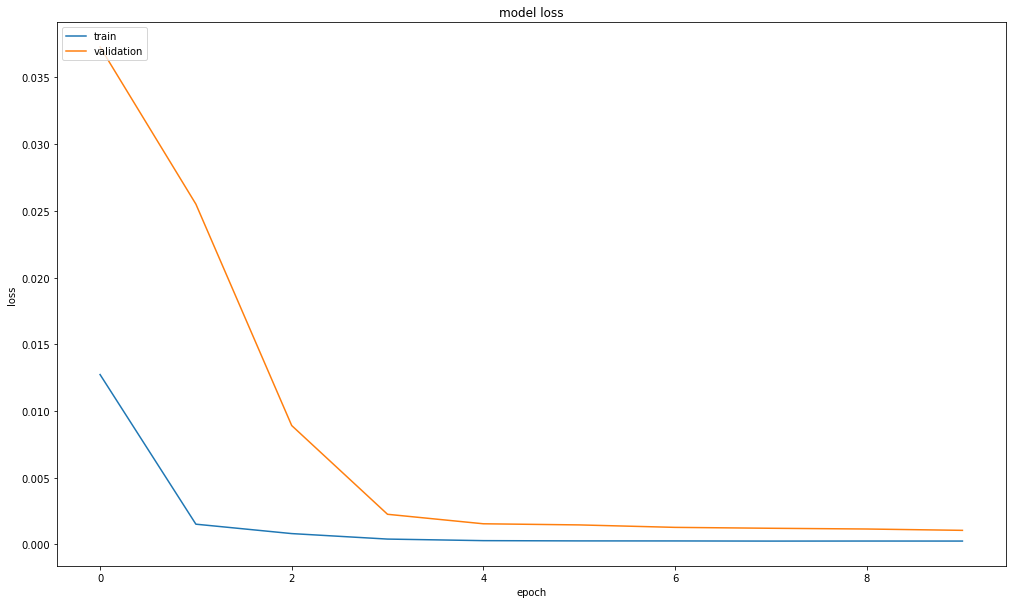

In [58]:
# Training the model
history1 = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
# Finding train and test predictinos
train_predict_scaled = model3.predict(x_train)
val_predict_scaled = model3.predict(x_val)

# Reversing the scaling performed on the dataset
train_predict = scaler.inverse_transform(train_predict_scaled)
val_predict = scaler.inverse_transform(val_predict_scaled)

In [60]:
# Generating dataframe for plotting
df_plot = df_wip[['Adj Close', 'Date']]

# Add train predictions according to respective dates
df_plot["train_preds"] = np.nan
df_plot["train_preds"][time_step:len(train_data)] =  train_predict[:,0]

# Add x test data according to respective dates
df_plot["val_preds"] = np.nan
df_plot["val_preds"][len(train_data)+time_step:] = val_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,train_preds,val_preds
0,7791.299805,2016-01-04,NaN,NaN
1,7784.649902,2016-01-05,NaN,NaN
2,7741.000000,2016-01-06,NaN,NaN
3,7568.299805,2016-01-07,NaN,NaN
4,7601.350098,2016-01-08,NaN,NaN
...,...,...,...,...
1476,17086.250000,2021-12-27,NaN,16832.945312
1477,17233.250000,2021-12-28,NaN,16815.441406
1478,17213.599609,2021-12-29,NaN,16809.974609
1479,17203.949219,2021-12-30,NaN,16812.115234


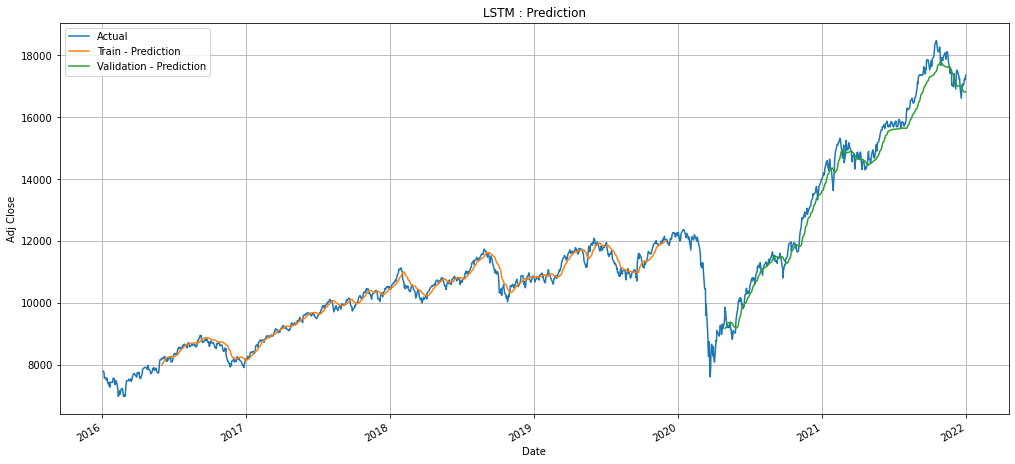

<Figure size 1224x720 with 0 Axes>

In [61]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [62]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100_model3"]=calculate_metrics(df_plot["Adj Close"][time_step:len(train_data)], train_predict[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100_model3"]=calculate_metrics(df_plot["Adj Close"][len(train_data)+time_step:], val_predict[:,0])

Training Metrics:
MSE :  178.85562598459464
R2 Score :  0.9749141371415309
MAPE :  0.013244293428016703

Validation Metrics:
MSE :  374.2252997552363
R2 Score :  0.9797987887646842
MAPE :  0.021842072472830612



## Examining different model metrices

In [63]:
# metrices for trainng
df_train_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3
MSE,238.111107,278.454176,302.956218,178.855626
R2,0.959829,0.945063,0.934970,0.974914
MAPE,0.018486,0.020774,0.022432,0.013244


In [64]:
# metrices for validation
df_val_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3
MSE,1536.805489,2135.690085,1782.733144,374.225300
R2,0.458644,-0.045494,0.271520,0.979799
MAPE,0.080360,0.110528,0.092639,0.021842


## KEY TAKE-AWAY
    1. Univariate_100_model3 is selected as it has the best metrics.

## Prediction for 'Out of Time Data'

In [65]:
# Import the out of time data set
df_out_time = pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')

# Print and check
df_out_time

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
5,2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400
6,2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200
7,2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000
8,2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700
9,2022-01-14,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500


In [66]:
# Finding number of entries in new data
new_len = len(df_out_time)
print("No. of new entries : ", len(df_out_time))

No. of new entries :  23


In [67]:
#checking for null values in new data
df_out_time.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [68]:
# Read the dataset
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [69]:
# Appending the new data to old data
df_out_wip = pd.concat([ df, df_out_time])

# Renumbering index
df_out_wip.reset_index(drop=True, inplace=True)

# Print and check
df_out_wip

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1499,2022-01-28,17208.300781,17373.500000,17077.099609,17101.949219,17101.949219,355300.0
1500,2022-01-31,17301.050781,17410.000000,17264.150391,17339.849609,17339.849609,321700.0
1501,2022-02-01,17529.449219,17622.400391,17244.550781,17576.849609,17576.849609,386400.0
1502,2022-02-02,17706.199219,17794.599609,17674.800781,17780.000000,17780.000000,271200.0


In [70]:
# Extracting the test data set
df_test = df_out_wip[-time_step-new_len:]

# Print and check
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
1381,2021-08-09,16281.349609,16320.750000,16179.049805,16258.250000,16258.250000,240500.0
1382,2021-08-10,16274.799805,16359.250000,16202.250000,16280.099609,16280.099609,288000.0
1383,2021-08-11,16327.299805,16338.750000,16162.549805,16282.250000,16282.250000,277900.0
1384,2021-08-12,16303.650391,16375.500000,16286.900391,16364.400391,16364.400391,280200.0
1385,2021-08-13,16385.699219,16543.599609,16376.299805,16529.099609,16529.099609,321900.0
...,...,...,...,...,...,...,...
1499,2022-01-28,17208.300781,17373.500000,17077.099609,17101.949219,17101.949219,355300.0
1500,2022-01-31,17301.050781,17410.000000,17264.150391,17339.849609,17339.849609,321700.0
1501,2022-02-01,17529.449219,17622.400391,17244.550781,17576.849609,17576.849609,386400.0
1502,2022-02-02,17706.199219,17794.599609,17674.800781,17780.000000,17780.000000,271200.0


In [71]:
# Extracting the input dataset
df_input = df_test[['Adj Close']]

# Print and check
df_input

,Adj Close
1381,16258.250000
1382,16280.099609
1383,16282.250000
1384,16364.400391
1385,16529.099609
...,...
1499,17101.949219
1500,17339.849609
1501,17576.849609
1502,17780.000000


In [72]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Define the timestep to consider
time_step = 100

# Generate test and train splits
x_test, y_test = create_dataset(scaled_data, time_step)

# Print the shape of train set
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_test :  (23, 100)
Shape of y_test :  (23,)


In [73]:
# Reshape input into shape --> [samples, time steps, features] which is required for LSTM
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

# Print the shape of train set
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_test :  (23, 100, 1)
Shape of y_test :  (23,)


In [74]:
# Finding train and test predictinos
test_predict_scaled = model3.predict(x_test)

# Reversing the scaling performed on the dataset
test_predict = scaler.inverse_transform(test_predict_scaled)

In [76]:
# Generating dataframe for plotting
df_plot = df_test[['Adj Close', 'Date']]

# Add test predictions according to respective dates
df_plot["test_preds"] = np.nan
df_plot["test_preds"][time_step:len(scaled_data)] =  test_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,test_preds
1381,16258.250000,2021-08-09,NaN
1382,16280.099609,2021-08-10,NaN
1383,16282.250000,2021-08-11,NaN
1384,16364.400391,2021-08-12,NaN
1385,16529.099609,2021-08-13,NaN
...,...,...,...
1499,17101.949219,2022-01-28,17788.294922
1500,17339.849609,2022-01-31,17713.130859
1501,17576.849609,2022-02-01,17645.679688
1502,17780.000000,2022-02-02,17596.322266


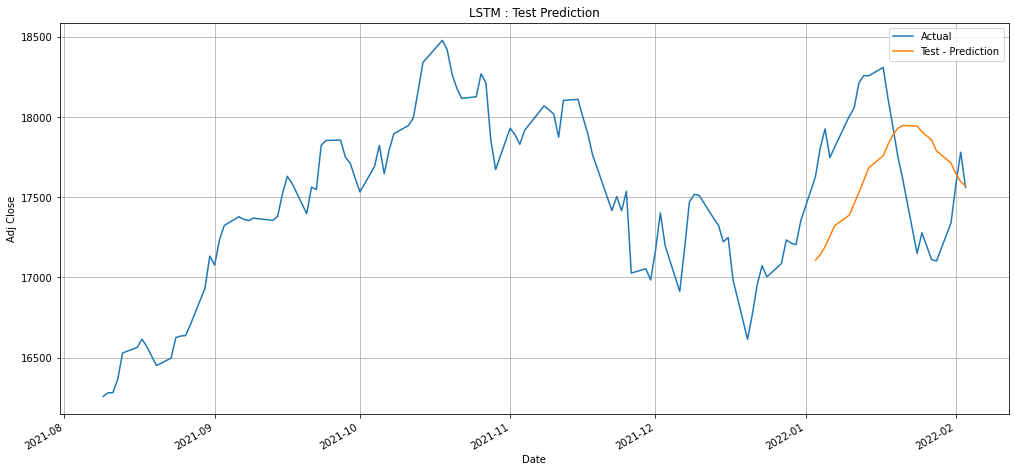

<Figure size 1224x720 with 0 Axes>

In [77]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Test Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['test_preds'], label='Test - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [79]:
# Calculating metrics for the test predictions
print("Test Metrics:")
calculate_metrics(df_plot["Adj Close"][time_step:len(scaled_data)], test_predict[:,0])

Test Metrics:
MSE :  529.2461104274804
R2 Score :  -1.089740889844578
MAPE :  0.026713027789960785



[529.2461104274804, -1.089740889844578, 0.026713027789960785]

In [80]:
# Extracting the required data
df_test_preds = df_plot[['Adj Close', 'test_preds']]
df_test_preds = df_test_preds[-23:]

# Renumbering index
df_test_preds.reset_index(drop=True, inplace=True)

# Save the test preds to .csv file
df_test_preds.to_csv('test_preds.csv')

# Print and check
df_test_preds

,Adj Close,test_preds
0,17625.699219,17107.455078
1,17805.250000,17140.503906
2,17925.250000,17191.189453
3,17745.900391,17256.806641
4,17812.699219,17322.525391
5,18003.300781,17387.867188
6,18055.750000,17457.542969
7,18212.349609,17529.154297
8,18257.800781,17605.179688
9,18255.750000,17682.634766


In [81]:
# Define a function to get the future predictions from the model
def future_preds(last_day, last_input, time_period):
    model_input = last_input
    time_step = 100
    preds=[]
    for i in range(time_period):
        # Getting corresponding dates
        tomorrow = last_day + timedelta(1)

        # Getting future predictions
        next_pred_scaled = model3.predict(model_input)
        next_pred = scaler.inverse_transform(next_pred_scaled)
        preds.append([tomorrow.item().strftime('%Y-%m-%d'), next_pred.item()])
        model_input = np.roll(model_input, -1)
        model_input[0][time_step-1] = next_pred_scaled
        
        # Updating to next day
        last_day = tomorrow
        
    return preds

In [82]:
# Getting the last recorded day
given_day = pd.to_datetime(df_plot['Date'])[-1:]
given_day

# Getting the future predictions for the given time period
time_period=15

# Getting the predictions
preds = future_preds(given_day, x_test[-1:], time_period)

# Convert the prediction to a dataframe
df_future = pd.DataFrame(preds, columns=['Date', 'future_preds'])

# Save the test preds to .csv file
df_test_preds.to_csv('future_preds.csv')

# Print and check
df_future

,Date,future_preds
0,2022-02-04,17570.142578
1,2022-02-05,17552.779297
2,2022-02-06,17541.597656
3,2022-02-07,17534.500000
4,2022-02-08,17530.031250
5,2022-02-09,17527.208984
6,2022-02-10,17525.388672
7,2022-02-11,17524.160156
8,2022-02-12,17523.265625
9,2022-02-13,17522.552734


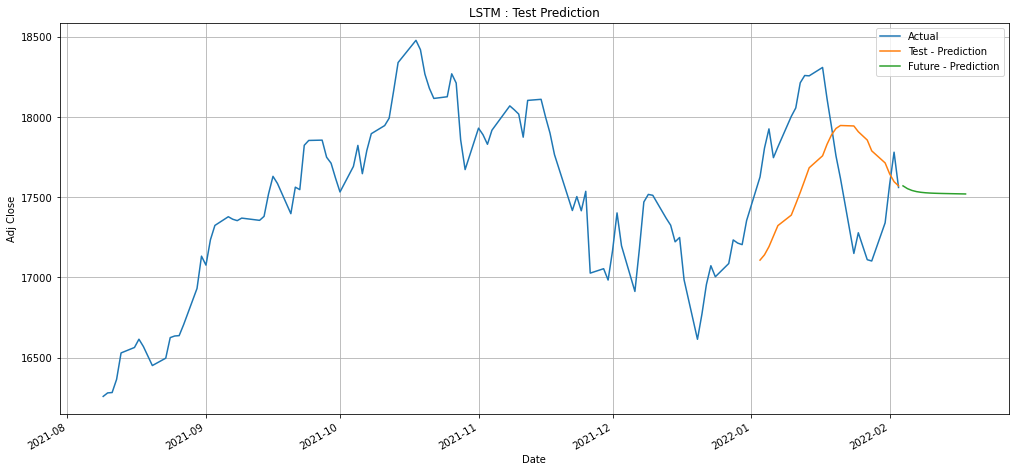

<Figure size 1224x720 with 0 Axes>

In [83]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Test Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['test_preds'], label='Test - Prediction')
plt.plot(pd.to_datetime(df_future['Date']), df_future['future_preds'], label='Future - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()